In [1]:
import urllib
import os
import glob
import random
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

/home/collin/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [37]:
height = 256
width = 256

## Load Training Images

In [38]:
CORPUS_PATH = "train"

In [39]:
classes = os.listdir(CORPUS_PATH)

image_list = []
label_list = []

for i, c in enumerate(classes):
    print(c)
    terrain_path = os.path.join(CORPUS_PATH, c)
    for f_name in os.listdir(terrain_path):
        img = cv2.imread(os.path.join(terrain_path, f_name), 0)
        image_list.append(np.expand_dims(cv2.resize(img, (height, width)), -1))
        label_list.append(i)


vegetation
clouds
water
desert


In [40]:
X = np.stack(image_list)
y = np.array(label_list)

In [41]:
one_hot_labels = to_categorical(y, num_classes=len(classes))

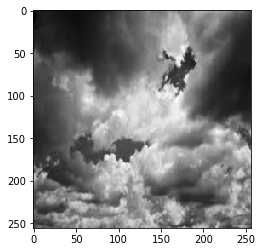

In [42]:
plt.imshow(X[14, :, :, 0], cmap='gray')

In [43]:
one_hot_labels[14]

array([0., 1., 0., 0.])

In [44]:
input_shape = (height, width, 1)
input_tensor = Input(input_shape, dtype=np.float32)

In [45]:
from keras.applications.resnet50 import ResNet50

model = ResNet50(classes=len(classes), weights=None, input_tensor=input_tensor)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from keras.applications.inception_v3 import InceptionV3
model = InceptionV3(classes=len(classes), weights=None, input_tensor=input_tensor)

In [30]:
model = Sequential()
model.add(Conv2D(64, 5, input_shape=input_shape, activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X.shape

In [46]:
model.fit(X, one_hot_labels, epochs=64, batch_size=5)

Epoch 1/64
48/48 [==============================] - 79s 2s/step - loss: 5.6906 - acc: 0.1875
Epoch 2/64
48/48 [==============================] - 65s 1s/step - loss: 2.5993 - acc: 0.2500
Epoch 3/64
48/48 [==============================] - 65s 1s/step - loss: 1.8438 - acc: 0.3125
Epoch 4/64
48/48 [==============================] - 65s 1s/step - loss: 2.0850 - acc: 0.3542
Epoch 5/64
48/48 [==============================] - 66s 1s/step - loss: 1.4898 - acc: 0.4583
Epoch 6/64
48/48 [==============================] - 66s 1s/step - loss: 2.4970 - acc: 0.2917
Epoch 7/64
48/48 [==============================] - 64s 1s/step - loss: 1.7867 - acc: 0.4167
Epoch 8/64
48/48 [==============================] - 65s 1s/step - loss: 1.9611 - acc: 0.3125
Epoch 9/64
48/48 [==============================] - 65s 1s/step - loss: 1.6154 - acc: 0.3125
Epoch 10/64
48/48 [==============================] - 64s 1s/step - loss: 1.5668 - acc: 0.4375
Epoch 11/64
48/48 [==============================] - 63s 1s/step - lo

KeyboardInterrupt: 

## Read images

In [11]:
def download_image(url, file_name):
    return urllib.urlretrieve(url, file_name)

In [12]:
with open("test_images.txt", 'r') as f:
    image_urls = f.read().split("\n")

In [23]:
for i, image_url in enumerate(image_urls):
    download_image(image_url, os.path.join("images", str(i)))